In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
from feature_engine.discretisation import EqualWidthDiscretiser,EqualFrequencyDiscretiser,DecisionTreeDiscretiser
from feature_engine.encoding import OrdinalEncoder
from matplotlib import pyplot as plt
from sklearn.datasets import load_boston
from sklearn.preprocessing import KBinsDiscretizer

In [55]:
data_set = load_boston()
data_set

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

## Dividing the variable into intervals of equal width
In equal-width discretization, the variable values are sorted into intervals of the same width. The number of
intervals is decided arbitrarily and the width is determined by the range of values of the variable and the number
of bins to create.

In [56]:
data = pd.DataFrame(data_set['data'],columns=data_set['feature_names'])
data['target'] = data_set['target']
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [57]:
disc = EqualWidthDiscretiser(variables=['LSTAT'])
disc.fit(data)
disc.binner_dict_

{'LSTAT': [-inf,
  5.354,
  8.978,
  12.602,
  16.226,
  19.85,
  23.474,
  27.098000000000003,
  30.722,
  34.346,
  inf]}

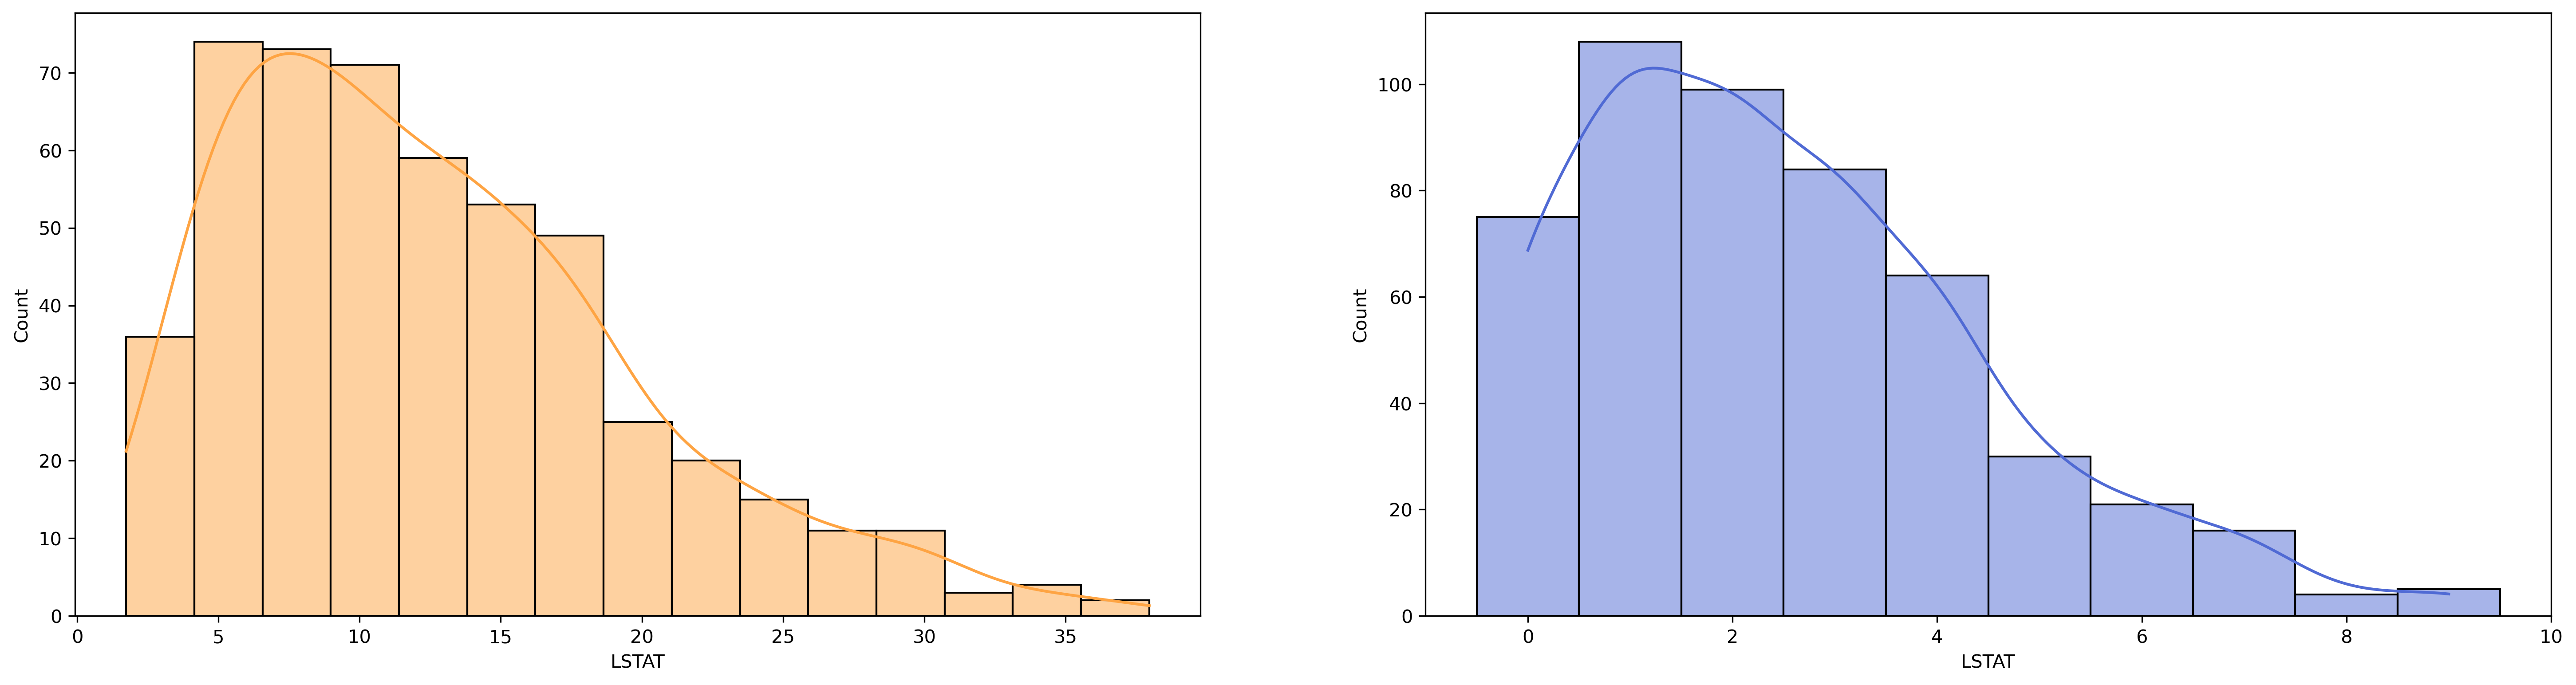

In [58]:
data_tar_disc = disc.transform(data)

fig,axes = plt.subplots(nrows=1,ncols=2,figsize=[24,6],dpi=300)
axes = axes.ravel()
sns.histplot(x=data.LSTAT,kde=True,color='#FEA443',ax=axes[0])
sns.histplot(x=data_tar_disc.LSTAT,kde=True,discrete=True,color='#506AD4',ax=axes[1])
plt.show()

## Sorting the variable values in intervals of equal frequency
Equal-frequency discretization divides the values of the variable into intervals that carry the same proportion of
observations. The interval width is determined by quantiles, and therefore different intervals may have different
widths. In summary, equal-frequency discretization using quantiles consists of dividing the continuous variable
into N quantiles, with N to be defined by the user. This discretization technique is particularly useful for skewed
variables as it spreads the observations over the different bins equally.

In [59]:
disc = EqualFrequencyDiscretiser(variables=['LSTAT'])
disc.fit(data)
disc.binner_dict_

{'LSTAT': [-inf,
  4.68,
  6.29,
  7.7650000000000015,
  9.53,
  11.36,
  13.33,
  15.620000000000008,
  18.06,
  23.035,
  inf]}

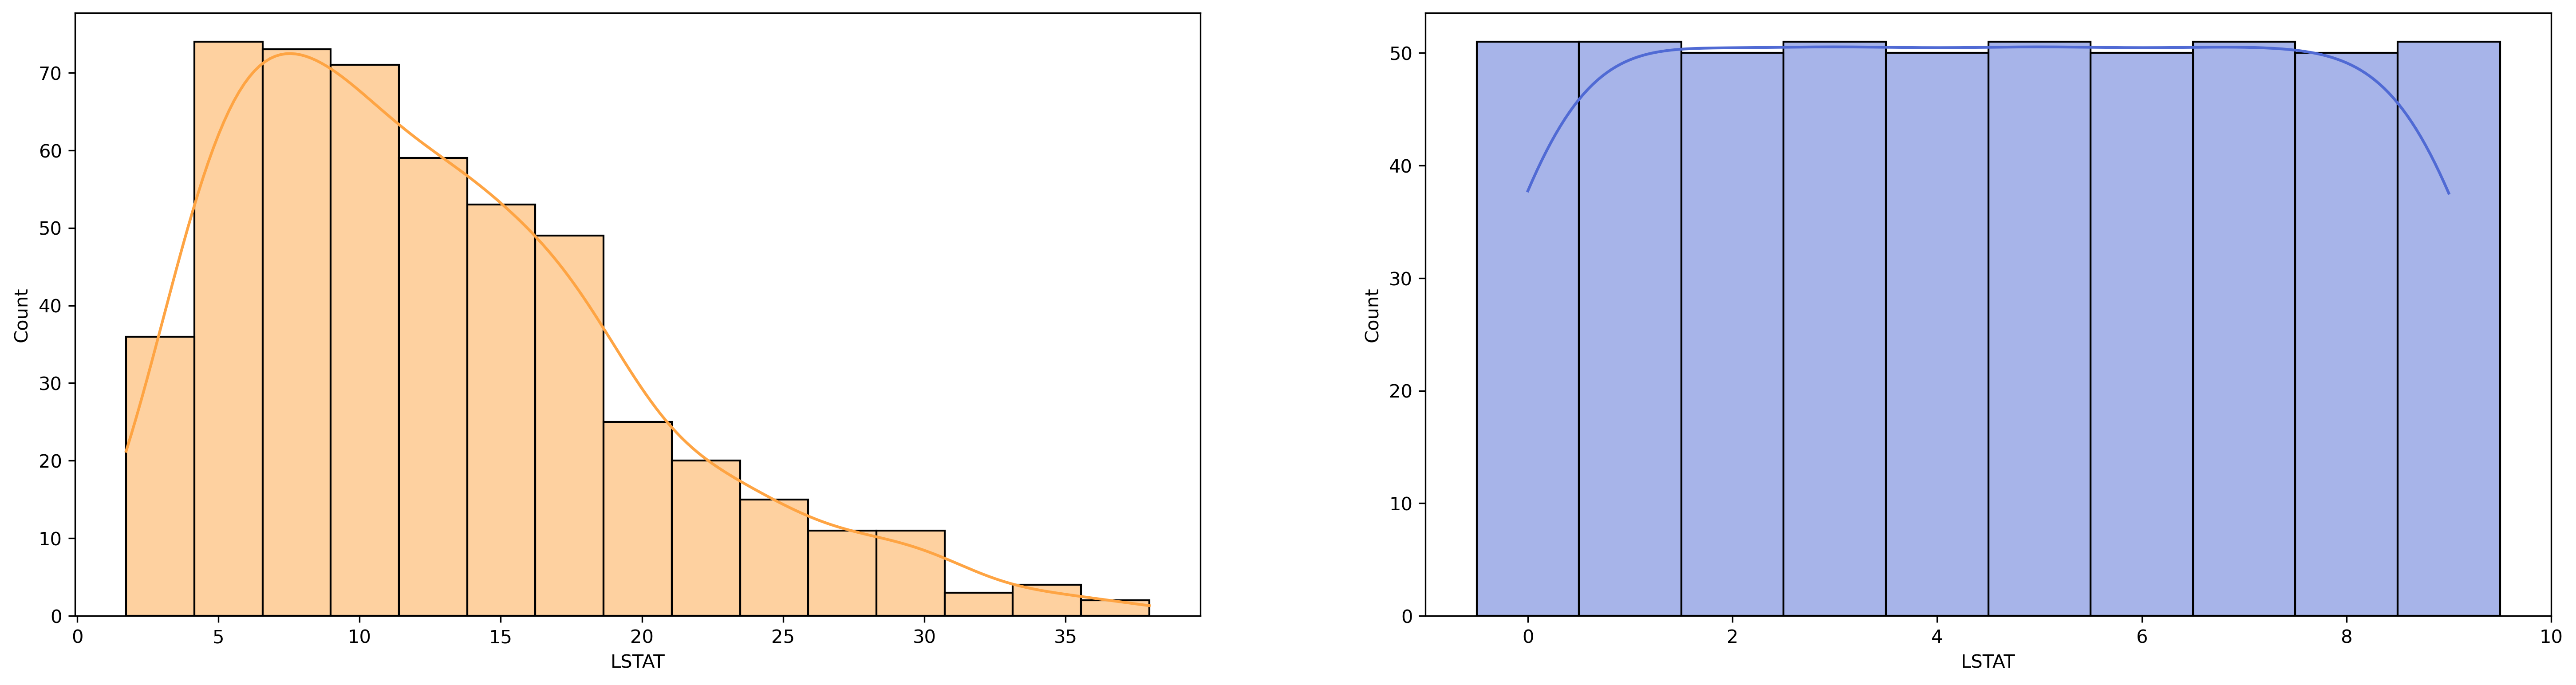

In [60]:
data_tar_disc = disc.transform(data)

fig,axes = plt.subplots(nrows=1,ncols=2,figsize=[24,6],dpi=300)
axes = axes.ravel()
sns.histplot(x=data.LSTAT,kde=True,color='#FEA443',ax=axes[0])
sns.histplot(x=data_tar_disc.LSTAT,kde=True,discrete=True,color='#506AD4',ax=axes[1])
plt.show()

## Performing discretization with k-means clustering
In discretization using k-means clustering, the intervals are the clusters identified by the k-means algorithm.
The number of clusters (k) is defined by the user. The k-means clustering algorithm has two main steps.
In the initialization step, k observations are chosen randomly as the initial centers of the k clusters,
and the remaining data points are assigned to the closest cluster. In the iteration step, the centers of the clusters
are re-computed as the average points of all of the observations within the cluster, and the observations are reassigned
to the newly created closest cluster. The iteration step continues until the optimal k centers are found.

In [61]:
disc = KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='kmeans')
disc.fit(data[['LSTAT']])
disc.bin_edges_

array([array([ 1.73      ,  5.70294683,  8.62275281, 11.8561236 , 15.42360528,
       18.85375776, 22.02048701, 25.22743939, 28.53189744, 32.80423077,
       37.97      ])], dtype=object)

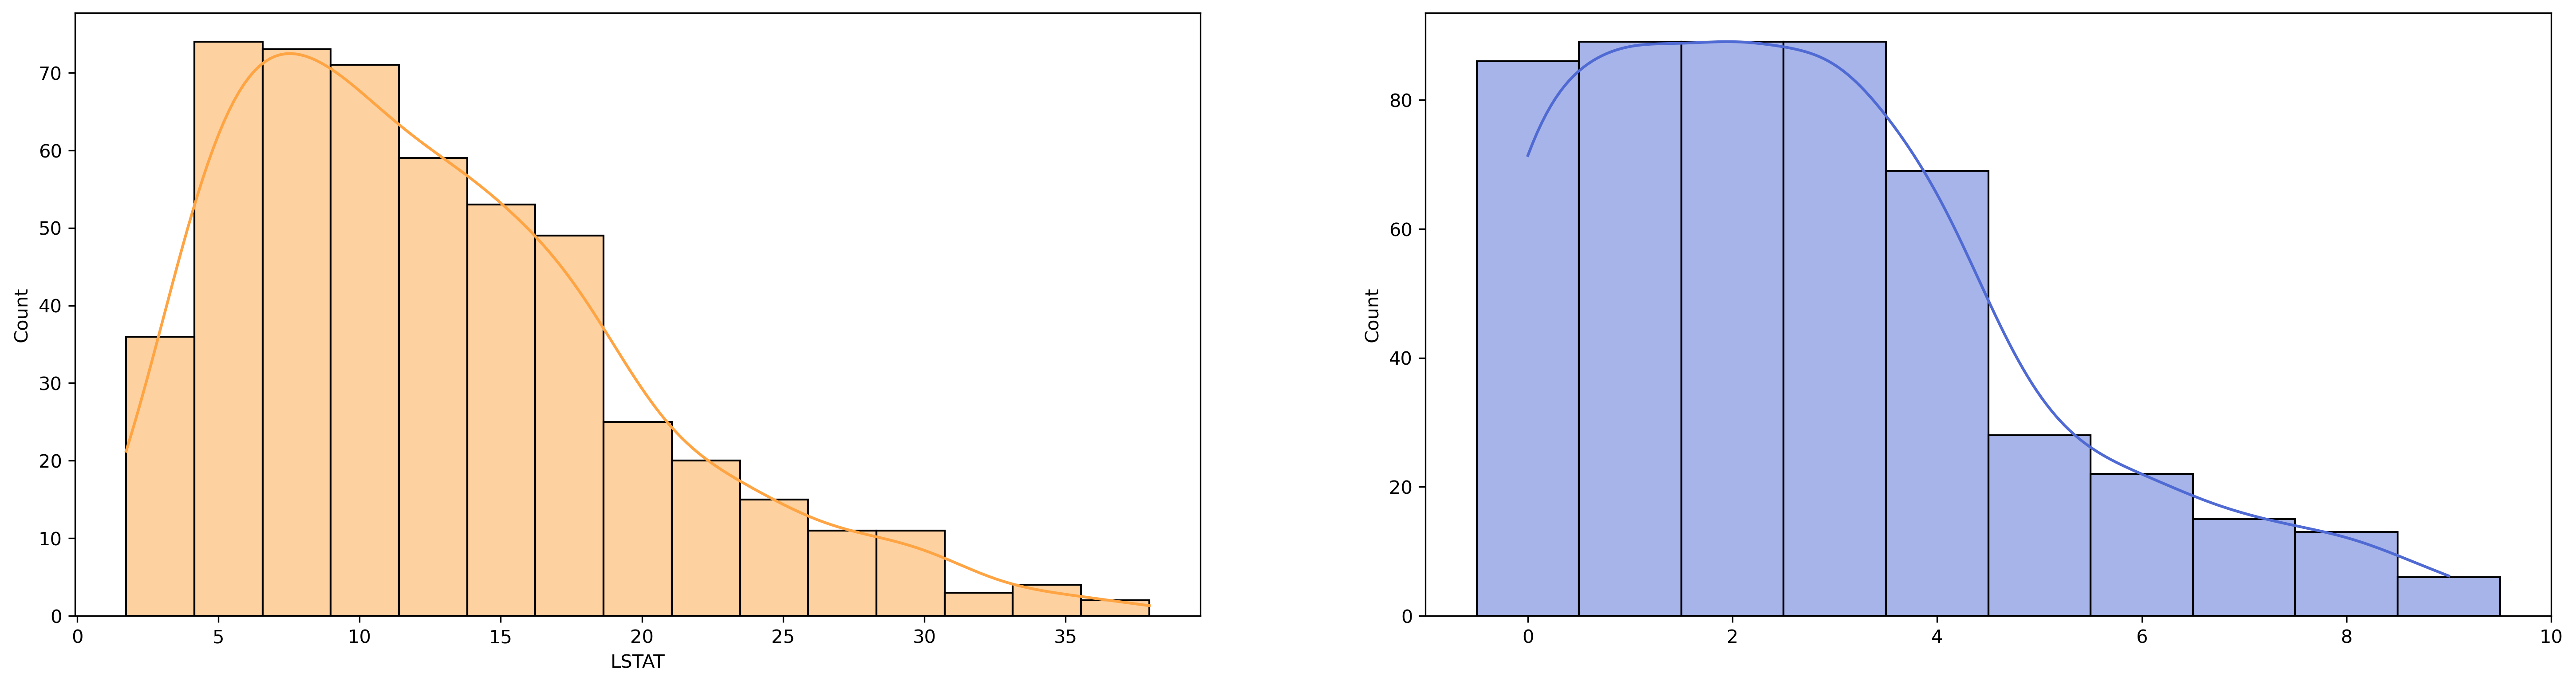

In [62]:
data_tar_disc = disc.transform(data[['LSTAT']])

fig,axes = plt.subplots(nrows=1,ncols=2,figsize=[24,6],dpi=300)
axes = axes.ravel()
sns.histplot(x=data.LSTAT,kde=True,color='#FEA443',ax=axes[0])
sns.histplot(x=data_tar_disc.reshape(1,-1)[0],kde=True,discrete=True,color='#506AD4',ax=axes[1])
plt.show()

## Using decision trees for discretization
Discretization with decision trees consists of using a decision tree to identify the optimal bins in which to sort the
variable values. The decision tree is built using the variable to discretize, and the target. When a decision tree makes
a prediction, it assigns an observation to one of N end leaves, therefore, any decision tree will generate a discrete
output, the values of which are the predictions at each of its N leaves. Discretization with decision trees creates a
monotonic relationship between the bins and the target.

In [63]:
disc = DecisionTreeDiscretiser(cv=10,variables=['LSTAT'])
disc.fit(data,data.target)
disc.binner_dict_['LSTAT'].best_params_

{'max_depth': 3}

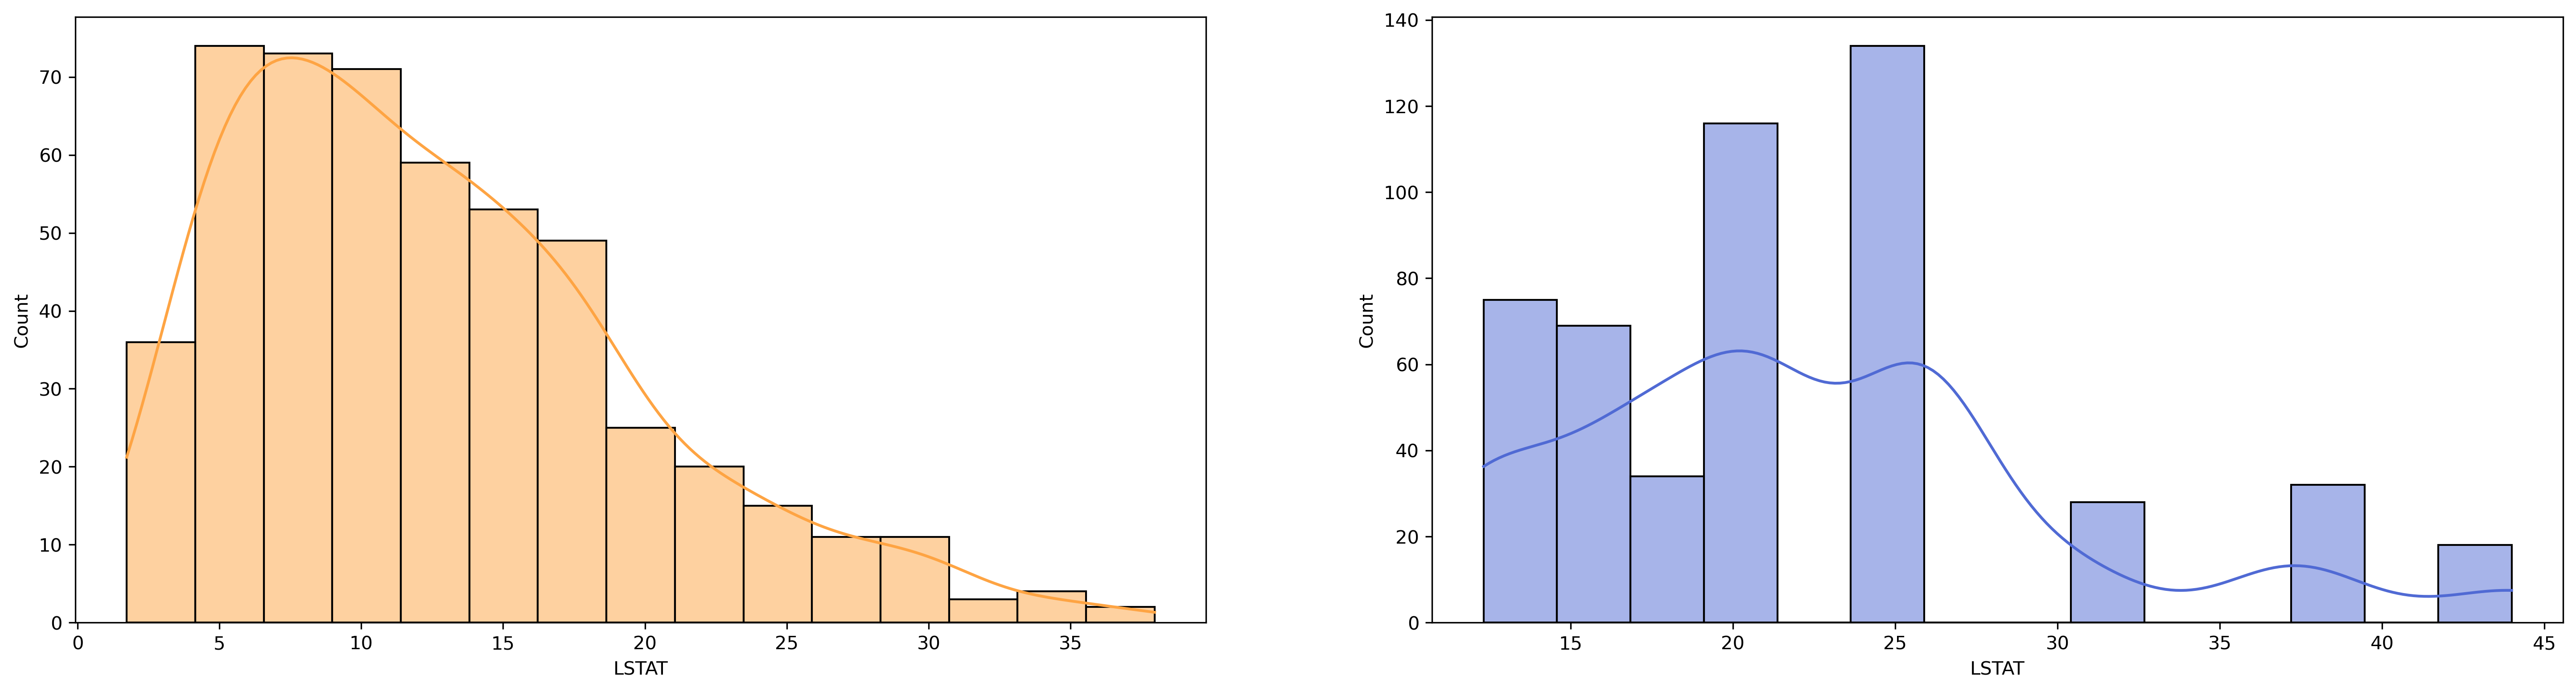

In [66]:
data_tar_disc = disc.transform(data)

fig,axes = plt.subplots(nrows=1,ncols=2,figsize=[24,6],dpi=300)
axes = axes.ravel()
sns.histplot(x=data.LSTAT,kde=True,color='#FEA443',ax=axes[0])
sns.histplot(x=data_tar_disc.LSTAT,discrete=False,kde=True,color='#506AD4',ax=axes[1])
plt.show()